In [1]:
# Importing relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the training dataset.

data = pd.read_csv('C:\\Users\\hp\\Desktop\\Loan Prediction dataset from Vidhya Analytics\\train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Column names.

data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# Accessing quick information on the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
# From the info above, it is obvious that there are a lot of missing values.

'Counting the number of Educated and non-Educated'

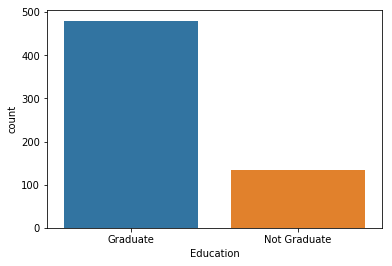

In [6]:
# Viewing the distribution of some features.
# Education.

import seaborn as sns

sns.countplot(data['Education'])
('Counting the number of Educated and non-Educated')

In [7]:
# From the graph above, most of the loan applicants are graduates.

In [8]:
# Checking the unique count of subsets in the Education column/feature.

data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

'Count of each Property Area'

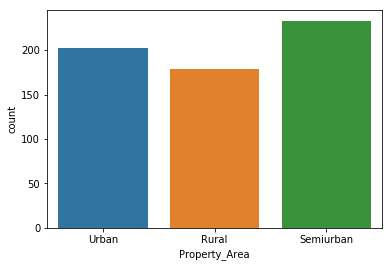

In [9]:
# Property Area

sns.countplot(data['Property_Area'])
('Count of each Property Area')

In [10]:
# From the plot above, it is obvious that most of the collateral are in semi-urban and urban areas.

In [11]:
print(data.Property_Area.isna().sum())

0


In [12]:
#data.Property_Area = pd.get_dummies(data.Property_Area)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = LabelEncoder()
data['Property_Area'] = label.fit_transform(data.iloc[:, 11])

#encoder = OneHotEncoder(categorical_features=['Property_Area'])
#data = encoder.fit_transform(data).to_array()

In [13]:
data['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [14]:
# Checking the unique count of each subset in the feature (Credit_History).

data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
# Over 75% of the applicants have good credit records.

In [16]:
# Checking unique count of subsets in Married column.

data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
# There are more married applicants in the system.

In [18]:
# CORRECTING SOME ABNORMAL ENTRIES.

# The below code changes the entire row (where the Dependents column is '3+') across all the features to 4. It is not our desired output. Hence, we do not run it.
#data[data['Dependents'] == '3+'] = 4

In [19]:
# The eight row of the Dependents column (index number 7) is 3+ and cannot be computed as an integer.
# We therefore have to change it to a computable number.
# Since it's over 3, we settle for 4


# Dependents column,row index 7 should be assigned 4
data['Dependents'][7] = 4

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
# It seems there are more rows (apart from row eight/index row 7) in the Dependents column with the value '3+'.
# Therefore, we have to assign 4 to all of them using the code below:

data.loc[data['Dependents'] == '3+', 'Dependents'] = 4

In [21]:
# Checking to see if row index 7 in the Dependents column has been changed from 3+ to 4.

data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,1,N


In [22]:
# Converting categorical features in the dataset into dummies.

data.Gender = pd.get_dummies(data.Gender)
data.Married = pd.get_dummies(data.Married)
data.Education = pd.get_dummies(data.Education)
data.Self_Employed = pd.get_dummies(data.Self_Employed)
#data.Property_Area = pd.get_dummies(data.Property_Area)
data.Loan_Status = pd.get_dummies(data.Loan_Status)

In [23]:
# Viewing the output.

data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,1,1,5849,0.0,NaN,360.0,1.0,2,0
1,LP001003,0,0,1,1,1,4583,1508.0,128.0,360.0,1.0,0,1
2,LP001005,0,0,0,1,0,3000,0.0,66.0,360.0,1.0,2,0


In [24]:
# Filling missing values in respective columns using mean and median. 

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Dependents = data.Dependents.fillna(data.Dependents.median())
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.median())
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median())
data.Credit_History = data.Credit_History.fillna(data.Credit_History.median())

In [25]:
data.Married = data.Married.fillna(data.Gender.median())
data.Married.isna().sum()

0

In [26]:
data.Gender = data.Gender.fillna(data.Gender.median())
data.Gender.isna().sum()

0

In [27]:
# Viewing the corrected/cleaned dataset.

data.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,1,1,5849,0.0,146.412162,360.0,1.0,2,0
1,LP001003,0,0,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,1
2,LP001005,0,0,0,1,0,3000,0.0,66.000000,360.0,1.0,2,0
3,LP001006,0,0,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,0
4,LP001008,0,1,0,1,1,6000,0.0,141.000000,360.0,1.0,2,0
5,LP001011,0,0,2,1,0,5417,4196.0,267.000000,360.0,1.0,2,0
6,LP001013,0,0,0,0,1,2333,1516.0,95.000000,360.0,1.0,2,0
7,LP001014,0,0,4,1,1,3036,2504.0,158.000000,360.0,0.0,1,1
8,LP001018,0,0,2,1,1,4006,1526.0,168.000000,360.0,1.0,2,0
9,LP001020,0,0,1,1,1,12841,10968.0,349.000000,360.0,1.0,1,1


In [28]:
# Unique value count.

data['Gender'].value_counts()

0    502
1    112
Name: Gender, dtype: int64

'Gender distribution'

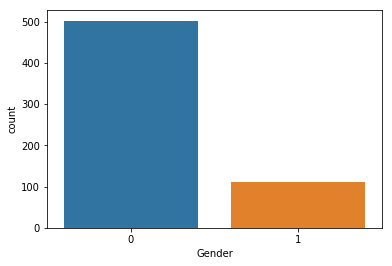

In [29]:
# Plotting Gender distribution.

sns.countplot(data['Gender'])
('Gender distribution')

In [30]:
# the graph above shows that there are more male applicants than female applicants. The male applicants are about 5 times greater in number.

In [31]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.346906,0.781759,0.814332,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.312704
std,0.386497,0.476373,0.413389,0.389155,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [32]:
# From the desriptive statistics above;

# Count: the total number of observations/samples is 614,
# Mean: (0=Female, 1=Male) Gender has a mean of 0.817 which is very close to 1, implying that there are more male than female applicants;
#       (0=Married, 1=Not) Married = 0.65, there are more married than unmarried applicants;
#       (0=Graduate, 1=Not) Education = 0.21 which is very close to 0, implying that educated (graduates) applicants are overwhelmingly more than the uneducated (non-graduates);
#       (0=No, 1=Yes) Self-Employed = 0.18 which is almost 0, implying that majority of the applicants are not self employed.

In [33]:
# Education count.

data['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [34]:
# There are more graduate applicants than non-graduates.

In [35]:
# Self-Employed count.

data.Self_Employed.value_counts()

1    500
0    114
Name: Self_Employed, dtype: int64

In [36]:
# Majority of the applicants are not self employed. This implies that a lot of them may be salary earners and the firm can decide to deduct a certain percentage of their monthly salary to service the loan.
# 0 = Not self-employed while 1 = self employed.

In [37]:
# Feature Selection (Alternative).

# data = data.drop([['Loan_ID', 'Coapplicantincome']], axis = 1)
# x = data.iloc[:, :-1].values
# y = data.iloc[:, 10].values

In [38]:
# Defining x and y variables. (Instead of using the alternative method written in the cell above).

x = data.iloc[:, [1,2,3,4,5,6,8,9,10,11]].values
y = data.iloc[:, 12].values

In [39]:
# Splitting the dataset into train and test sets.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x,y, test_size = 0.25, random_state = 0)

In [40]:
# MODEL BUILDING
# ALGORITHM 1
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None)

In [41]:
# Predicting the model.

y_pred_n = clf.predict(x_test)
y_pred_n

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
      dtype=uint8)

In [42]:
# Evaluating the model's performance.

print('Training accuracy is {:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy is {:.3f}'.format(clf.score(x_test,y_test)))

Training accuracy is 0.798
Test set accuracy is 0.825


In [43]:
# With the test set accuracy higher than that of the training set, the model is underfitted.

In [44]:
# ALGORITHM 2
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred_f = forest.predict(x_test)
y_pred_f

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
      dtype=uint8)

In [46]:
print('Training accuracy is {:.3f}'.format(forest.score(x_train,y_train)))
print('Test set accuracy is {:.3f}'.format(forest.score(x_test,y_test)))

Training accuracy is 1.000
Test set accuracy is 0.792


In [74]:
# ALGORITHM 3
# ADABOOST

# Model Training/Fitting.
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0)

In [75]:
# Model Prediction.

y_pred_b = boost.predict(x_test)
y_pred_b

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=uint8)

In [76]:
# Model Performance Evaluation.

print('Training accuracy: {:.3f}'.format(boost.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(boost.score(x_test,y_test)))

Training accuracy: 0.848
Test set accuracy: 0.831


In [105]:
# ALGORITHM 4
# GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gradient.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
# MODEL PREDICTION.

y_pred_g = gradient.predict(x_test)

In [107]:
# MODEL PERFORMANCE EVALUATION.

print('Training accuracy: {:.3f}'.format(gradient.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(gradient.score(x_test,y_test)))

Training accuracy: 0.848
Test set accuracy: 0.825


In [49]:
# These next algorithms involve Euclidean distance and will therefore require feature scaling to ensure normality of the distribution.
# That is, mean that is centered around zero and standard deviation that equals 1.

In [108]:
# ALGORITHM 5
# KNearestNeighbors.

from sklearn.neighbors import KNeighborsClassifier

# Applying Feature Scaling.

from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


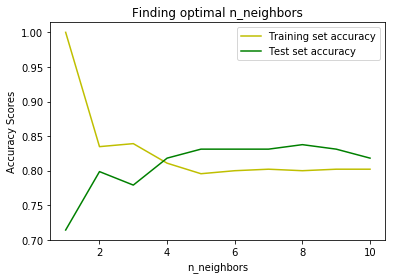

In [109]:
# Finding optimal n_neighbors.

n_rng = range(1,11)

train_accuracy = []
test_accuracy = []

for n in n_rng:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    
    # Displaying the optimal n_neighbors via plot.
    
plt.plot(n_rng, train_accuracy, label = 'Training set accuracy', c = 'y')
plt.plot(n_rng, test_accuracy, label = 'Test set accuracy', c = 'g')
plt.title('Finding optimal n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Scores')

plt.legend()

In [52]:
# Choosing any point from 4 to 10 will yield an underfitted model because the Test set accuracy is higher than the training set accuracy at those points.
# This is made visible by the graph as the Test set accuracy curve (green) is higher than the training set accuracy curve (yellow) at those points.
# Choosing 1 will result in an overfitted model as the Training set accuracy will be 1.00 (100%) due to a high model complexity.
# Therefore, the optimal n_neighbors is one that yields a high Test set accuracy and a higher Training set accuracy (that is less than 100%).
# We will choose 2 because it yields the highest Test set accuracy that devoids the model of underfitting.

In [118]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [119]:
y_pred_k = knn.predict(x_test)
y_pred_k

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=uint8)

In [120]:
print('Training accuracy is {:.3f}'.format(knn.score(x_train,y_train)))
print('Test set accuracy is {:.3f}'.format(knn.score(x_test,y_test)))

Training accuracy is 0.835
Test set accuracy is 0.799


In [121]:
# ALGORITHM 6
# LOGISTIC REGRESSION (Linear/Straight line classifier)

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
y_pred_l = reg.predict(x_test)
y_pred_l

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=uint8)

In [123]:
print('Training set accuracy: {:.3f}'.format(reg.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(reg.score(x_test,y_test)))

Training set accuracy: 0.802
Test set accuracy: 0.831


In [124]:
# The evaluation scores show that the model is underfitted (Test accuracy higher than training accuracy)

In [138]:
# ALGORITHM 7
# Support Vector Classifier (SVC)

from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C=100)
svc.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
y_pred_s = svc.predict(x_test)
y_pred_s

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
      dtype=uint8)

In [140]:
print('Training accuracy is', svc.score(x_train,y_train))
print('Test set accuracy is', svc.score(x_test,y_test))

Training accuracy is 0.9130434782608695
Test set accuracy is 0.7662337662337663


In [128]:
# The test dataset will therefore be predicted using AdaBoost since it has the highest accuracy to generalize of all the algorithms used to train the data.

In [142]:
# Importing the test dataset.

Test = pd.read_csv('C:\\Users\\hp\\Desktop\\Loan Prediction dataset from Vidhya Analytics\\test_lAUu6dG.csv')
Test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [143]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [144]:
# Cleaning the Test dataset,

In [145]:
# Defining x (we decided to name it x_test)

x_test = Test.iloc[:, :]

# Dropping features that are not needed in the model.

x_test = x_test.drop(['Loan_ID'], axis = 1)
x_test = x_test.drop(['CoapplicantIncome'], axis =1)

# Viewing x

x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,78.0,360.0,1.0,Urban


In [146]:
# Encoding categorical features

x_test.Gender = pd.get_dummies(x_test.Gender)
x_test.Married = pd.get_dummies(x_test.Married)
x_test.Education = pd.get_dummies(x_test.Education)
x_test.Self_Employed = pd.get_dummies(x_test.Self_Employed)
x_test.Property_Area = pd.get_dummies(x_test.Property_Area)

In [147]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,1,5720,110.0,360.0,1.0,0
1,0,0,1,1,1,3076,126.0,360.0,1.0,0
2,0,0,2,1,1,5000,208.0,360.0,1.0,0
3,0,0,2,1,1,2340,100.0,360.0,NaN,0
4,0,1,0,0,1,3276,78.0,360.0,1.0,0


In [148]:
# Correcting an abnormality in Dependents column.

x_test.loc[x_test['Dependents'] == '3+', 'Dependents'] = 4

In [149]:
# Filling missing values.

x_test.Gender = x_test.Gender.fillna(x_test.Gender.median())
x_test.Dependents = x_test.Dependents.fillna(x_test.Dependents.median())
x_test.Self_Employed = x_test.Self_Employed.fillna(x_test.Self_Employed.median())
x_test.LoanAmount = x_test.LoanAmount.fillna(x_test.LoanAmount.mean())
x_test.Loan_Amount_Term = x_test.Loan_Amount_Term.fillna(x_test.Loan_Amount_Term.median())
x_test.Credit_History = x_test.Credit_History.fillna(x_test.Credit_History.mode())

In [150]:
# Cross checking data info.

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
Gender              367 non-null uint8
Married             367 non-null uint8
Dependents          367 non-null object
Education           367 non-null uint8
Self_Employed       367 non-null uint8
ApplicantIncome     367 non-null int64
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Credit_History      338 non-null float64
Property_Area       367 non-null uint8
dtypes: float64(3), int64(1), object(1), uint8(5)
memory usage: 16.2+ KB


In [151]:
# Credit History still has missing values. mode didn't work so we fill the missing values with median.

x_test.Credit_History = x_test.Credit_History.fillna(x_test.Credit_History.median())

In [153]:
# Predicting the new data using AdaBoost classifier since it performed with the highest accuracy during Training,

y_pred = boost.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [154]:
submission = pd.DataFrame({'Loan_ID' : Test['Loan_ID'], 'Loan_Status' : y_pred})
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
5,LP001054,0
6,LP001055,0
7,LP001056,1
8,LP001059,0
9,LP001067,0


In [156]:
filename = 'Loan Prediction.csv'
submission.to_csv(filename, index = False)
print('My First Analytics Vidhya Submission:', filename)

My First Analytics Vidhya Submission: Loan Prediction.csv
